# Time Series Forecasting

### **<b>Problem Statement:</b> : Predict what will be the consumption demand for electricity category in next month**

### **Hallo World!, myself Somnath Banerjee, I have collected Electric Consumption Data during 2019 calender year across PAN India state wise, I have developed this Time Series Forecasting Machine Learning Module for predicting the next month consumption of each state**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlalchemy
sqlalchemy.__version__
import sys
sys.version

'3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]'

In [3]:
# pip install xlrd

## Looking at the data summary

In [4]:

import pandas as pd
import numpy as np

# Suppressing scientific notation
np.set_printoptions(suppress=True)
SAMPLEDATA=pd.read_csv(filepath_or_buffer="G:/IVY/data/MACHINE_LEARNING/ELECTRIC_CONSUMPTION.csv", 
                              sep=',', encoding='latin-1')
print(type(SAMPLEDATA))
pd.set_option

pd.options.display.max_columns=50
pd.options.display.max_rows=100
print('Shape before deleting duplicate values:', SAMPLEDATA.shape)

SAMPLEDATA=SAMPLEDATA.drop_duplicates()
print('Shape After deleting duplicate values:', SAMPLEDATA.shape)

SAMPLEDATA.head()

<class 'pandas.core.frame.DataFrame'>
Shape before deleting duplicate values: (359, 34)
Shape After deleting duplicate values: (359, 34)


,Dates,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,Gujarat,MP,Maharashtra,Goa,DNH,Andhra Pradesh,Telangana,Karnataka,Kerala,Tamil Nadu,Pondy,Bihar,Jharkhand,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02-01-2019,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,319.5,253.0,428.6,12.8,18.6,164.6,204.2,206.3,72.7,268.3,6.3,82.3,24.8,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03-01-2019,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,316.7,253.6,419.6,13.7,18.2,170.1,204.5,212.2,73.6,285.2,6.5,82.0,25.6,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04-01-2019,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,74.8,301.9,239.3,395.8,12.6,16.7,165.2,201.2,205.3,73.4,270.3,6.4,82.9,26.3,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05-01-2019,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,69.0,313.2,228.2,411.1,13.0,17.6,167.4,201.7,212.4,75.4,286.8,6.6,77.0,23.0,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06-01-2019,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,68.1,320.7,227.4,408.6,12.9,18.6,171.2,194.9,217.5,75.4,298.3,7.2,76.4,22.6,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3


In [5]:
SAMPLEDATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dates              359 non-null    object 
 1   Punjab             359 non-null    float64
 2   Haryana            359 non-null    float64
 3   Rajasthan          359 non-null    float64
 4   Delhi              359 non-null    float64
 5   UP                 359 non-null    float64
 6   Uttarakhand        359 non-null    float64
 7   HP                 359 non-null    float64
 8   J&K                359 non-null    float64
 9   Chandigarh         359 non-null    float64
 10  Chhattisgarh       359 non-null    float64
 11  Gujarat            359 non-null    float64
 12  MP                 359 non-null    float64
 13  Maharashtra        359 non-null    float64
 14  Goa                359 non-null    float64
 15  DNH                359 non-null    float64
 16  Andhra Pradesh     359 non

## **Feature Enginearing**

In [6]:
# List of column names to sum
columns_to_sum = ['Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP', 'Uttarakhand',
                  'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat', 'MP',
                  'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh', 'Telangana', 'Karnataka',
                  'Kerala', 'Tamil Nadu', 'Pondy', 'Bihar', 'Jharkhand', 'Odisha',
                  'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Assam', 'Manipur',
                  'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura']

# Summing values across the columns row-wise (axis=1)
SAMPLEDATA['India'] = SAMPLEDATA[columns_to_sum].sum(axis=1)

# Print the resulting DataFrame
print(SAMPLEDATA)



          Dates  Punjab  Haryana  Rajasthan  Delhi     UP  Uttarakhand    HP  \
0    02-01-2019   119.9    130.3      234.1   85.8  313.9         40.7  30.0   
1    03-01-2019   121.9    133.5      240.2   85.5  311.8         39.3  30.1   
2    04-01-2019   118.8    128.2      239.8   83.5  320.7         38.1  30.1   
3    05-01-2019   121.0    127.5      239.1   79.2  299.0         39.2  30.2   
4    06-01-2019   121.4    132.6      240.4   76.6  286.8         39.2  31.0   
..          ...     ...      ...        ...    ...    ...          ...   ...   
354  27-12-2019   103.7    110.4      211.4   63.8  229.9         33.4  29.3   
355  28-12-2019    97.2    101.7      212.7   62.0  234.2         32.7  27.6   
356  29-12-2019   237.2    214.1      232.7  128.5  421.3         42.0  29.9   
357  30-12-2019   251.9    220.1      246.5  126.9  437.4         43.3  31.6   
358  31-12-2019   255.0    223.2      253.5  134.9  424.0         44.3  31.6   

      J&K  Chandigarh  Chhattisgarh  Gu

In [7]:
SAMPLEDATA['Dates'] = pd.to_datetime(SAMPLEDATA['Dates'], format='%d-%m-%Y', dayfirst=True)
SAMPLEDATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Dates              359 non-null    datetime64[ns]
 1   Punjab             359 non-null    float64       
 2   Haryana            359 non-null    float64       
 3   Rajasthan          359 non-null    float64       
 4   Delhi              359 non-null    float64       
 5   UP                 359 non-null    float64       
 6   Uttarakhand        359 non-null    float64       
 7   HP                 359 non-null    float64       
 8   J&K                359 non-null    float64       
 9   Chandigarh         359 non-null    float64       
 10  Chhattisgarh       359 non-null    float64       
 11  Gujarat            359 non-null    float64       
 12  MP                 359 non-null    float64       
 13  Maharashtra        359 non-null    float64       
 14  Goa       

In [8]:
# Function to get month from a date
def Function_get_month(inpDate):
    return(inpDate.month)

# Function to get Year from a date
def Function_get_year(inpDate):
    return(inpDate.year)


# Creating new columns
SAMPLEDATA['Month']=SAMPLEDATA['Dates'].apply(Function_get_month)
SAMPLEDATA['Year']=SAMPLEDATA['Dates'].apply(Function_get_year)

SAMPLEDATA.head()

,Dates,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,Gujarat,MP,Maharashtra,Goa,DNH,Andhra Pradesh,Telangana,Karnataka,Kerala,Tamil Nadu,Pondy,Bihar,Jharkhand,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,India,Month,Year
0,2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,319.5,253.0,428.6,12.8,18.6,164.6,204.2,206.3,72.7,268.3,6.3,82.3,24.8,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4,3373.4,1,2019
1,2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,316.7,253.6,419.6,13.7,18.2,170.1,204.5,212.2,73.6,285.2,6.5,82.0,25.6,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6,3403.7,1,2019
2,2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,74.8,301.9,239.3,395.8,12.6,16.7,165.2,201.2,205.3,73.4,270.3,6.4,82.9,26.3,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5,3304.1,1,2019
3,2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,69.0,313.2,228.2,411.1,13.0,17.6,167.4,201.7,212.4,75.4,286.8,6.6,77.0,23.0,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5,3308.9,1,2019
4,2019-01-06,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,68.1,320.7,227.4,408.6,12.9,18.6,171.2,194.9,217.5,75.4,298.3,7.2,76.4,22.6,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3,3316.9,1,2019


In [9]:
# Checking unique values in Year and Month Columns
print("Unique Values in Year Column: ", SAMPLEDATA['Year'].sort_values().unique())
print("Unique Values in Month Column: ", SAMPLEDATA['Month'].sort_values().unique())

Unique Values in Year Column:  [2019]
Unique Values in Month Column:  [ 1  2  3  4  5  6  7  8  9 10 11 12]


## Electric Consumption for each month state wise

In [10]:
SAMPLEDATA.columns

Index(['Dates', 'Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP', 'Uttarakhand',
       'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat', 'MP',
       'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh', 'Telangana', 'Karnataka',
       'Kerala', 'Tamil Nadu', 'Pondy', 'Bihar', 'Jharkhand', 'Odisha',
       'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Assam', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura', 'India', 'Month',
       'Year'],
      dtype='object')

### Choose a state or India (I have chosed 'West Bengal' as an example)

In [12]:
INPUT_STATE_COUNTRY='West Bengal'

In [13]:
pd.crosstab(columns=SAMPLEDATA['Year'],
            index=SAMPLEDATA['Month'],
            values=SAMPLEDATA[INPUT_STATE_COUNTRY],   
            aggfunc='sum').melt()

,Year,value
0,2019,4289.7
1,2019,3761.9
2,2019,3808.4
3,2019,3948.7
4,2019,4405.4
5,2019,3964.7
6,2019,4722.1
7,2019,3975.1
8,2019,4741.9
9,2019,4233.1


## Visualizing the Total Electricity Consumption per month for the particular state

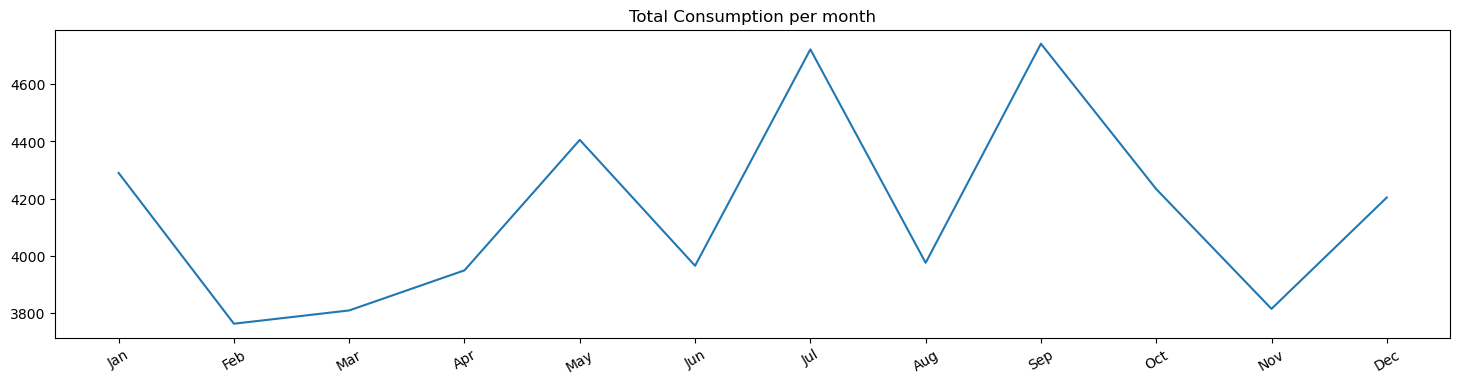

In [14]:
import matplotlib.pyplot as plt
Electric_Consumption=pd.crosstab(columns=SAMPLEDATA['Year'],
            index=SAMPLEDATA['Month'],
            values=SAMPLEDATA[INPUT_STATE_COUNTRY],
            aggfunc='sum').melt()['value']

MonthNames=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*1

# Plotting the sales
%matplotlib inline
Electric_Consumption.plot(kind='line', figsize=(18,4), title='Total Consumption per month')
# Setting the x-axis labels
plotLabels=plt.xticks(np.arange(0,12,1),MonthNames, rotation=30)

In [15]:
Electric_Consumption.values

array([4289.7, 3761.9, 3808.4, 3948.7, 4405.4, 3964.7, 4722.1, 3975.1,
       4741.9, 4233.1, 3814. , 4203.7])

In [16]:
Electric_Consumption.head()

0    4289.7
1    3761.9
2    3808.4
3    3948.7
4    4405.4
Name: value, dtype: float64

[          nan           nan           nan 4065.83333333 4119.63333333
 4215.19166667 4316.68333333 4291.1        4261.73333333           nan
           nan           nan]
[ 324.12916667 -397.2875      398.87916667 -198.42083333  204.47916667
 -331.77916667  324.12916667 -397.2875      398.87916667 -198.42083333
  204.47916667 -331.77916667]
[    nan     nan     nan 81.2875 81.2875 81.2875 81.2875 81.2875 81.2875
     nan     nan     nan]
[4289.7 3761.9 3808.4 3948.7 4405.4 3964.7 4722.1 3975.1 4741.9 4233.1
 3814.  4203.7]


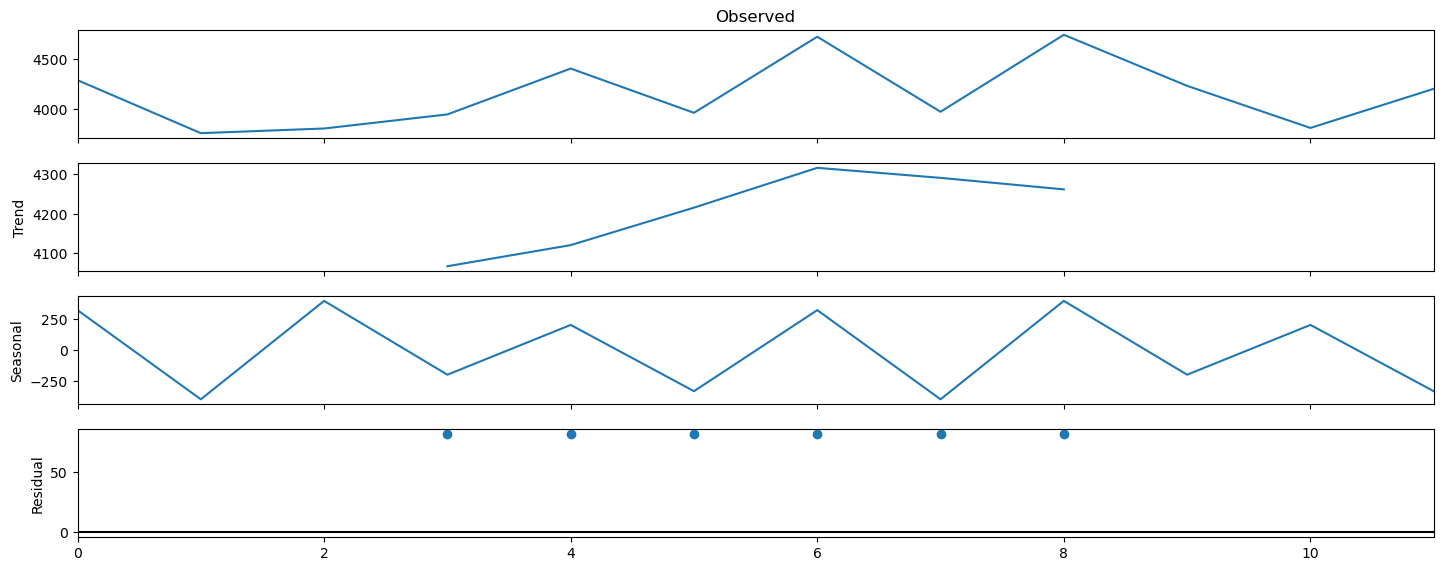

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = Electric_Consumption.values
result = seasonal_decompose(series, period=6)
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)
result.plot()
CurrentFig=plt.gcf()
CurrentFig.set_size_inches(16,6)
plt.show()

## Creating the predictive model for Total Sales Data

Next Six Month Forecast: 13    3866.235549
14    3890.178190
15    3901.592269
16    4233.550737
17    4190.660232
18    4087.545968
Name: Forecast, dtype: float64
#### Accuracy of model: 87.67 ####


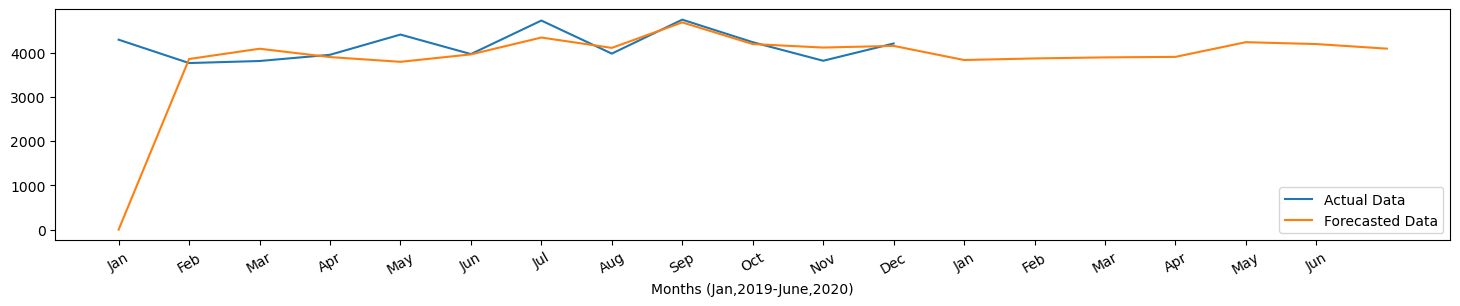

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

# Assuming Electric_Consumption is a pandas Series with datetime index

# Train the model on the full dataset 
SarimaxModel = SARIMAX(Electric_Consumption,  
                        order = (0, 1, 10),  
                        seasonal_order =(1, 0, 0, 6))
SalesModel = SarimaxModel.fit()
  
# Forecast for the next 6 months
forecast = SalesModel.predict(start = 0,
                          end = (len(Electric_Consumption)) + 6,
                          typ = 'levels').rename('Forecast')

print("Next Six Month Forecast:", forecast[-6:])

# Plot the forecast values
plt.figure(figsize=(18, 3))
Electric_Consumption.plot(legend=True, label='Actual Data')
forecast.plot(legend=True, label='Forecasted Data')

# Measuring the Training accuracy of the model
MAPE = np.mean(abs(Electric_Consumption - forecast[:len(Electric_Consumption)]) / Electric_Consumption) * 100
print('#### Accuracy of model:', round(100 - MAPE, 2), '####')

# Extend MonthNames list
# Generate the full range of months (historical + forecasted)
full_date_range = pd.date_range(Electric_Consumption.index[0], periods=len(Electric_Consumption) + 6, freq='M')

# Create MonthNames for the full date range (12 historical + 6 forecasted)
MonthNames = full_date_range.strftime('%b').tolist()

# Ensure the number of labels matches the number of tick positions (18)
plt.xticks(np.arange(0, 18, 1), MonthNames, rotation=30)
plt.xlabel("Months (Jan,2019-June,2020)", fontsize=10)

# Show plot
plt.show()


In [19]:
forecast.info()

<class 'pandas.core.series.Series'>
RangeIndex: 19 entries, 0 to 18
Series name: Forecast
Non-Null Count  Dtype  
--------------  -----  
19 non-null     float64
dtypes: float64(1)
memory usage: 284.0 bytes


In [20]:
Electric_Consumption.info()

<class 'pandas.core.series.Series'>
RangeIndex: 12 entries, 0 to 11
Series name: value
Non-Null Count  Dtype  
--------------  -----  
12 non-null     float64
dtypes: float64(1)
memory usage: 228.0 bytes


## Convert series into dataframe

In [21]:
Power_Consumption=Electric_Consumption.to_frame()
Power_Consumption=Power_Consumption.rename(columns={'value':'Consumption'})
print("Original Consumption :")
Power_Consumption.head(20)

Original Consumption :


,Consumption
0,4289.7
1,3761.9
2,3808.4
3,3948.7
4,4405.4
5,3964.7
6,4722.1
7,3975.1
8,4741.9
9,4233.1


In [22]:
Forecase_Power_Consumption=forecast.to_frame()
Forecase_Power_Consumption=Forecase_Power_Consumption.rename(columns={'Forecast':'Forecast_Consumption'})
print("forecasting Consumption month wise : ")
Forecase_Power_Consumption.head(20)

forecasting Consumption month wise : 


,Forecast_Consumption
0,0.000000
1,3853.408617
2,4085.378939
3,3897.007800
4,3789.835544
5,3957.688136
6,4338.136802
7,4104.710723
8,4679.962864
9,4190.897180


## Conccatinate two dataframes

In [23]:
Resultsample1=pd.concat([Power_Consumption,Forecase_Power_Consumption], axis=1)
# Function to subtract large from small
def subtract_large_from_small(row):
    if row['Consumption'] > row['Forecast_Consumption']:
        return row['Consumption'] - row['Forecast_Consumption']
    else:
        return row['Forecast_Consumption'] - row['Consumption']

Resultsample1['Difference'] = Resultsample1.apply(subtract_large_from_small, axis=1)
# Calculate C as a percentage of A
Resultsample1['Difference %'] = (Resultsample1['Difference'] / Resultsample1['Consumption']) * 100

Resultsample1.head(20)

,Consumption,Forecast_Consumption,Difference,Difference %
0,4289.7,0.000000,4289.700000,100.000000
1,3761.9,3853.408617,91.508617,2.432511
2,3808.4,4085.378939,276.978939,7.272843
3,3948.7,3897.007800,51.692200,1.309094
4,4405.4,3789.835544,615.564456,13.972953
5,3964.7,3957.688136,7.011864,0.176857
6,4722.1,4338.136802,383.963198,8.131196
7,3975.1,4104.710723,129.610723,3.260565
8,4741.9,4679.962864,61.937136,1.306167
9,4233.1,4190.897180,42.202820,0.996972


## **Reports by Chart**

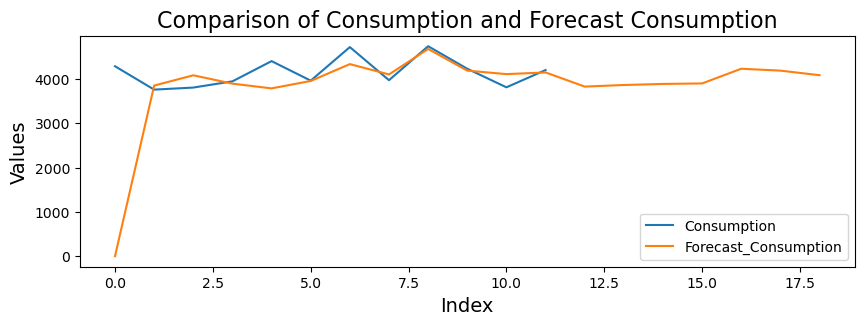

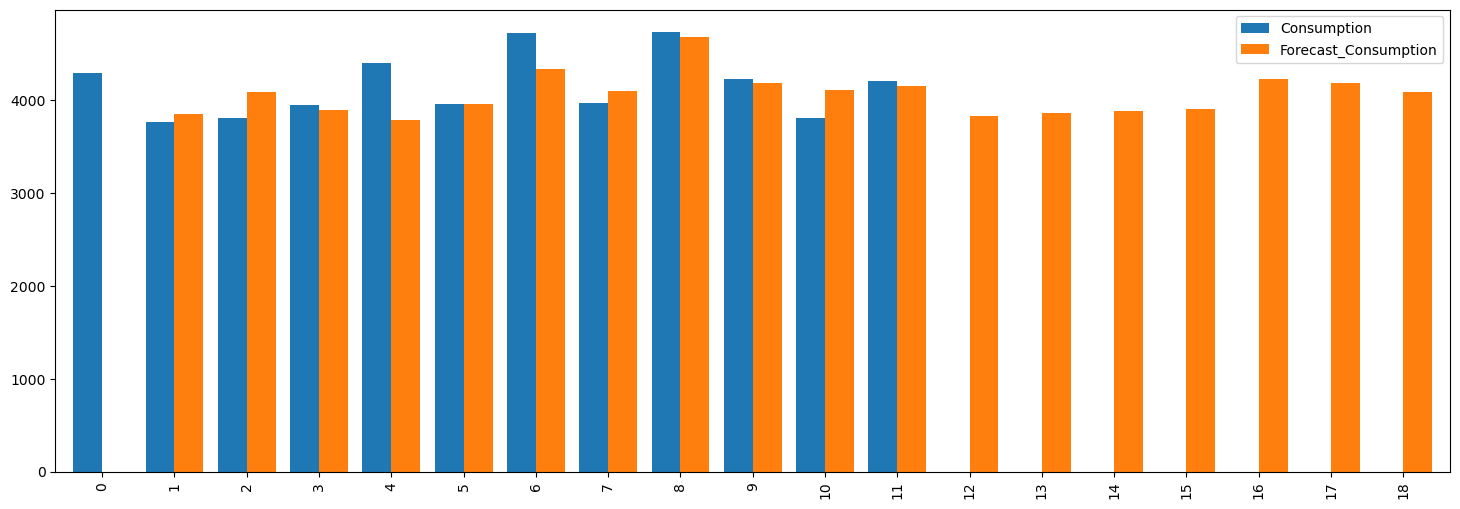

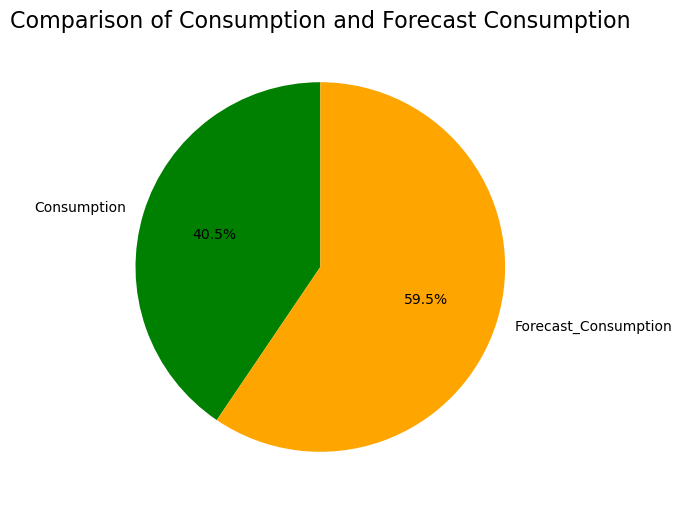

In [24]:
Resultsample1[['Consumption','Forecast_Consumption']].plot(kind='line', figsize=(10, 3))
plt.title('Comparison of Consumption and Forecast Consumption', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.show()
Resultsample1[['Consumption','Forecast_Consumption']].plot(kind='bar', figsize=(18, 6), width=0.8)

# Calculate the sum of columns A and B
sums_consumption = Resultsample1[['Consumption','Forecast_Consumption']].sum()

# Create a pie chart
plt.figure(figsize=(6, 6))
sums_consumption.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['green', 'orange'])

# Adding title
plt.title('Comparison of Consumption and Forecast Consumption', fontsize=16)

# Display the pie chart
plt.ylabel('')  # Hides the y-label (default 'sum')
plt.show()

In [25]:
import os
Folderpathtimeseries='G:/IVY/data/MACHINE_LEARNING/ML_RESULT'
Filenametimeseries='Predictedtimeseries_Power_Consumption_WestBengal.xlsx'
Filepathtimeseries=os.path.join(Folderpathtimeseries,Filenametimeseries)
Resultsample1.to_excel(Filepathtimeseries, index= False)
print("Predictedtimeseries_Power_Consumption_WestBengal.xlsx is exported to Folderpath=G:/IVY/data/MACHINE_LEARNING/ML_RESULT ")

Predictedtimeseries_Power_Consumption_WestBengal.xlsx is exported to Folderpath=G:/IVY/data/MACHINE_LEARNING/ML_RESULT 


### *I am really thankful to you to read my script of power consumption forecasting, I belief that this project will really helps to power generating industry, Goverment & other stake holders. This model is developed by Somnath Banerjee, GMail : somnathbanerjee342000@gmail.com**